In [4]:
# Import Modules
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import sys
import tarfile
import seaborn
import random
from tensorflow.examples.tutorials.mnist import input_data
from IPython.display import display, Image
from scipy import ndimage
from scipy.misc import imresize
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
import h5py
from PIL import Image
import glob

# Config the matlotlib backend as plotting inline in IPython
%matplotlib inline

# Preprocessing metadata

In [5]:
N = 5
IMAGE_SIZE = 32

def get_metadata(filename):
  f = h5py.File(filename)
  
  metadata= {}
  metadata['height'] = []
  metadata['label'] = []
  metadata['left'] = []
  metadata['top'] = []
  metadata['width'] = []
  
  def print_attrs(name, obj):
    vals = []
    if obj.shape[0] == 1:
        vals.append(obj[0][0])
    else:
        for k in range(obj.shape[0]):
            vals.append(f[obj[k][0]][0][0])
    metadata[name].append(vals)
  
  for item in f['/digitStruct/bbox']:
      f[item[0]].visititems(print_attrs)
  return metadata


In [6]:
test_folder = '../data/SVHN_data/test/'
test_metadata = get_metadata(test_folder+'digitStruct.mat')

In [8]:
NUM_SAMPLES_APP = 200
app_metadata = {}
app_metadata['height'] = test_metadata['height'][0:200]
app_metadata['label'] = test_metadata['label'][0:200]
app_metadata['left'] = test_metadata['left'][0:200]
app_metadata['top'] = test_metadata['top'][0:200]
app_metadata['width'] = test_metadata['width'][0:200]

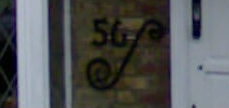

[5.0, 6.0]

In [16]:
sample = test_folder+'200.png'
display(Image.open(sample))
app_metadata['label'][199]

In [17]:
pickle_file = '../app/data/metadata.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'metadata': app_metadata
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise
    
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 46908


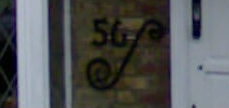

[5.0, 6.0]


In [22]:
pickle_file = '../app/data/metadata.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  metadata = save['metadata']
  del save  # hint to help gc free up memory

sample = test_folder+'200.png'
display(Image.open(sample))
print(metadata['label'][199])